# Twitter text report
### In this report, I am going to be comparing the tweets posted about climate change during easter and the day before easter. I am using a excel file containing tweets from april 3rd and 4th 2013 and comparing them using vader sentiment analyzer to see whether there are more positive posts on easter.

In [101]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings

In [102]:
posts = pd.read_csv("C:/Users/mason/Desktop/ClimateChange_Apr3-Apr4_2013_fixed.csv", encoding = 'utf-8')
posts.keys()

Index(['Unnamed: 0', 'Date', 'Title', 'Url', 'Domain', 'Language', 'Author',
       'Full Name', 'Full Text', 'Impressions', 'Original Url',
       'Thread Author', 'Thread Created Date', 'Thread Entry Type',
       'Twitter Followers', 'Twitter Following', 'Twitter Reply Count',
       'Twitter Retweets', 'Twitter Verified'],
      dtype='object')

### The raw data is structured as a .csv file or comma seperated file, which allows me to put the data for every post into a row. I organised the data by columns, having a column for the date it was posted, the title of the post, the url of the post, the domain, the language, the author, the authors full name, the text in the post, the number of impressions, the original url, the thread author, the thread creation date, the thread entry type, the number of followers the poster has, the number of accounts they are following, the reply count of the post, the amount of retweets, and if the account is twitter verified.

In [103]:
en_only = posts.loc[posts['Language'] == 'en']
en_only

,Unnamed: 0,Date,Title,Url,Domain,Language,Author,Full Name,Full Text,Impressions,Original Url,Thread Author,Thread Created Date,Thread Entry Type,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Retweets,Twitter Verified
0,0,2013-04-04 23:59:06.0,RT @MarionGroves Abbott says 10yrs ago he wore...,http://twitter.com/Qldaah/statuses/31996236101...,twitter.com,en,Qldaah,Qldaah (David Marler),RT @MarionGroves Abbott says 10yrs ago he wore...,1413,http://twitter.com/Qldaah/statuses/31996236101...,NaN,NaN,post,1413,1990,0,0,False
1,2,2013-04-04 23:58:04.0,RT @NSWFarmers RT @AustFarmInstitu: Two climat...,http://twitter.com/TheFacelessSpin/statuses/31...,twitter.com,en,TheFacelessSpin,TheFacelessSpin (FacelessFocusGroup),RT @NSWFarmers RT @AustFarmInstitu: Two climat...,1063,http://twitter.com/TheFacelessSpin/statuses/31...,NaN,NaN,post,1063,471,0,0,False
2,3,2013-04-04 23:57:33.0,Steve Stockman Hopes James Hansen's NASA Retir...,http://twitter.com/iamgreenbean/statuses/31996...,twitter.com,en,iamgreenbean,iamgreenbean (Green Bean),Steve Stockman Hopes James Hansen's NASA Retir...,4365,http://twitter.com/iamgreenbean/statuses/31996...,NaN,NaN,post,4365,4369,0,0,False
3,4,2013-04-04 23:57:01.0,Ted Turner Tells Obama to Get 'Climate Change ...,http://twitter.com/cpwilldo/statuses/319961839...,twitter.com,en,cpwilldo,cpwilldo (chris price),Ted Turner Tells Obama to Get 'Climate Change ...,3477,http://twitter.com/cpwilldo/statuses/319961839...,NaN,NaN,post,3477,3806,0,0,False
4,5,2013-04-04 23:56:52.0,The human race will never fully adapt to clima...,http://twitter.com/GreenSteve_com/statuses/319...,twitter.com,en,GreenSteve_com,GreenSteve_com (Green Steve),The human race will never fully adapt to clima...,5298,http://twitter.com/GreenSteve_com/statuses/319...,NaN,NaN,post,5298,4840,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7146,10062,2013-04-03 00:01:46.0,RT @SebHenbest The @ClimateComm new report lin...,http://twitter.com/kmac/statuses/3192382570051...,twitter.com,en,kmac,kmac (Kate Mackenzie),RT @SebHenbest The @ClimateComm new report lin...,3826,http://twitter.com/kmac/statuses/3192382570051...,NaN,NaN,post,3826,1657,0,0,True
7147,10063,2013-04-03 00:01:26.0,Think it's all hype? Might wanna listen to thi...,http://twitter.com/LFreshwater/statuses/319238...,twitter.com,en,LFreshwater,LFreshwater (Lou Freshwater),Think it's all hype? Might wanna listen to thi...,1048,http://twitter.com/LFreshwater/statuses/319238...,NaN,NaN,post,1048,719,0,0,False
7148,10070,2013-04-03 00:00:30.0,"Bhandari: All crises (energy, food, climate ch...",http://twitter.com/diegofguillen/statuses/3192...,twitter.com,en,diegofguillen,diegofguillen (diegofguillen),"Bhandari: All crises (energy, food, climate ch...",211,http://twitter.com/diegofguillen/statuses/3192...,NaN,NaN,post,211,238,0,0,False
7149,10071,2013-04-03 00:00:21.0,"#GlobalWarming Accelerating, Study Says - http...",http://twitter.com/greenerideal/statuses/31923...,twitter.com,en,greenerideal,greenerideal (Greener Ideal),"#GlobalWarming Accelerating, Study Says - http...",4776,http://twitter.com/greenerideal/statuses/31923...,NaN,NaN,post,4776,2631,0,0,False


### Here I take the data and narrow it down to only posts that were written in English

In [104]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

In [105]:
print(en_only['Full Text'][3])
print(analyser.polarity_scores(en_only['Full Text'][3]))

Ted Turner Tells Obama to Get 'Climate Change Under Control' http://t.co/hHGdcedpTL #mediabias
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [106]:
en_only['vader_scores'] = [analyser.polarity_scores(x) for x in en_only['Full Text']]
en_only['vader_scores'].head

<bound method NDFrame.head of 0       {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
7146    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
7147    {'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'comp...
7148    {'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...
7149    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
7150    {'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'comp...
Name: vader_scores, Length: 7151, dtype: object>

In [107]:
en_only['vader_scores'][2]['pos']

0.319

In [108]:
en_only['pos'] = [x['pos'] for x in en_only['vader_scores']]
en_only['pos']

0       0.073
1       0.000
2       0.319
3       0.000
4       0.000
        ...  
7146    0.000
7147    0.000
7148    0.110
7149    0.000
7150    0.269
Name: pos, Length: 7151, dtype: float64

### Here is where I implement the vader program to list the positivity rating of all of the posts. Vader does this by analyzing how many positive words are used in the post, like "enjoyed" or "loved".

In [109]:
from matplotlib import pyplot as plt

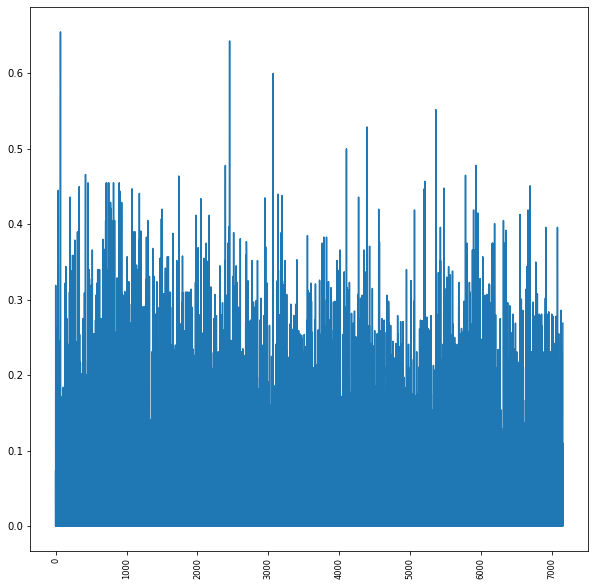

In [110]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(en_only['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

### Here is the graph showing the positivity rating of all of the posts.

In [111]:
type(en_only['Date'][0])

str

In [112]:
from datetime import datetime as dt

In [113]:
en_only['Datetime'] = [dt.strptime(x, '%Y-%m-%d %H:%M:%S.%f') for x in en_only['Date']]
print(type(en_only['Datetime'][0]))
print(en_only['Datetime'][0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2013-04-04 23:59:06


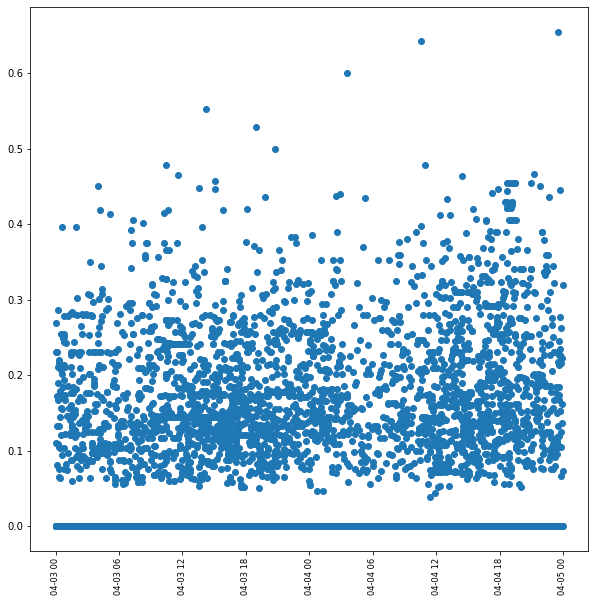

In [114]:
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.scatter(en_only['Datetime'], en_only['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

### Here I improve graph by grouping all of the posts by the date and time they were posted.

In [122]:
april_3 = en_only.loc[en_only['Datetime'] < '2013-04-04 00:00:00'].reset_index()
april_3

,index,Unnamed: 0,Date,Title,Url,Domain,Language,Author,Full Name,Full Text,...,Thread Created Date,Thread Entry Type,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Retweets,Twitter Verified,vader_scores,pos,Datetime
0,3584,5168,2013-04-03 23:59:34.0,RT @onemarketmedia We're filming @robshirkey a...,http://twitter.com/csiTO/statuses/319600091142...,twitter.com,en,csiTO,csiTO (CSI Toronto),RT @onemarketmedia We're filming @robshirkey a...,...,NaN,post,7589,259,0,0,True,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.216,2013-04-03 23:59:34
1,3585,5172,2013-04-03 23:57:54.0,RT @johnmcquaid The scale of climate change is...,http://twitter.com/christackett/statuses/31959...,twitter.com,en,christackett,christackett (Chris Tackett),RT @johnmcquaid The scale of climate change is...,...,NaN,post,4857,2043,0,0,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-03 23:57:54
2,3586,5174,2013-04-03 23:57:24.0,@msnbc 37% believe #ClimateChange is a hoax .....,http://twitter.com/Angelete71/statuses/3195995...,twitter.com,en,Angelete71,Angelete71 (Sociologist4Equality),@msnbc 37% believe #ClimateChange is a hoax .....,...,NaN,post,1496,1998,0,0,False,"{'neg': 0.186, 'neu': 0.754, 'pos': 0.06, 'com...",0.060,2013-04-03 23:57:24
3,3587,5175,2013-04-03 23:57:24.0,WJCT NEWS | Why Everglades Restoration Really ...,http://twitter.com/AllEverglades/statuses/3195...,twitter.com,en,AllEverglades,AllEverglades (GMD),WJCT NEWS | Why Everglades Restoration Really ...,...,NaN,post,334,104,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-03 23:57:24
4,3588,5176,2013-04-03 23:56:24.0,RT @EPAwater It's Earth Month & we're hosting ...,http://twitter.com/ToniGranato/statuses/319599...,twitter.com,en,ToniGranato,ToniGranato (Toni Granato),RT @EPAwater It's Earth Month & we're hosting ...,...,NaN,post,155,424,0,0,False,"{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...",0.075,2013-04-03 23:56:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,7146,10062,2013-04-03 00:01:46.0,RT @SebHenbest The @ClimateComm new report lin...,http://twitter.com/kmac/statuses/3192382570051...,twitter.com,en,kmac,kmac (Kate Mackenzie),RT @SebHenbest The @ClimateComm new report lin...,...,NaN,post,3826,1657,0,0,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-03 00:01:46
3563,7147,10063,2013-04-03 00:01:26.0,Think it's all hype? Might wanna listen to thi...,http://twitter.com/LFreshwater/statuses/319238...,twitter.com,en,LFreshwater,LFreshwater (Lou Freshwater),Think it's all hype? Might wanna listen to thi...,...,NaN,post,1048,719,0,0,False,"{'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'comp...",0.000,2013-04-03 00:01:26
3564,7148,10070,2013-04-03 00:00:30.0,"Bhandari: All crises (energy, food, climate ch...",http://twitter.com/diegofguillen/statuses/3192...,twitter.com,en,diegofguillen,diegofguillen (diegofguillen),"Bhandari: All crises (energy, food, climate ch...",...,NaN,post,211,238,0,0,False,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...",0.110,2013-04-03 00:00:30
3565,7149,10071,2013-04-03 00:00:21.0,"#GlobalWarming Accelerating, Study Says - http...",http://twitter.com/greenerideal/statuses/31923...,twitter.com,en,greenerideal,greenerideal (Greener Ideal),"#GlobalWarming Accelerating, Study Says - http...",...,NaN,post,4776,2631,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-03 00:00:21


In [123]:
easter = en_only.loc[en_only['Datetime'] > '2013-04-04 00:00:00'].reset_index()
easter

,index,Unnamed: 0,Date,Title,Url,Domain,Language,Author,Full Name,Full Text,...,Thread Created Date,Thread Entry Type,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Retweets,Twitter Verified,vader_scores,pos,Datetime
0,0,0,2013-04-04 23:59:06.0,RT @MarionGroves Abbott says 10yrs ago he wore...,http://twitter.com/Qldaah/statuses/31996236101...,twitter.com,en,Qldaah,Qldaah (David Marler),RT @MarionGroves Abbott says 10yrs ago he wore...,...,NaN,post,1413,1990,0,0,False,"{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...",0.073,2013-04-04 23:59:06
1,1,2,2013-04-04 23:58:04.0,RT @NSWFarmers RT @AustFarmInstitu: Two climat...,http://twitter.com/TheFacelessSpin/statuses/31...,twitter.com,en,TheFacelessSpin,TheFacelessSpin (FacelessFocusGroup),RT @NSWFarmers RT @AustFarmInstitu: Two climat...,...,NaN,post,1063,471,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-04 23:58:04
2,2,3,2013-04-04 23:57:33.0,Steve Stockman Hopes James Hansen's NASA Retir...,http://twitter.com/iamgreenbean/statuses/31996...,twitter.com,en,iamgreenbean,iamgreenbean (Green Bean),Steve Stockman Hopes James Hansen's NASA Retir...,...,NaN,post,4365,4369,0,0,False,"{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...",0.319,2013-04-04 23:57:33
3,3,4,2013-04-04 23:57:01.0,Ted Turner Tells Obama to Get 'Climate Change ...,http://twitter.com/cpwilldo/statuses/319961839...,twitter.com,en,cpwilldo,cpwilldo (chris price),Ted Turner Tells Obama to Get 'Climate Change ...,...,NaN,post,3477,3806,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-04 23:57:01
4,4,5,2013-04-04 23:56:52.0,The human race will never fully adapt to clima...,http://twitter.com/GreenSteve_com/statuses/319...,twitter.com,en,GreenSteve_com,GreenSteve_com (Green Steve),The human race will never fully adapt to clima...,...,NaN,post,5298,4840,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-04 23:56:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,3579,5056,2013-04-04 00:01:16.0,Liberal MP @DennisJensenMP takes aim at Tim Fl...,http://twitter.com/bazarazzi/statuses/31960051...,twitter.com,en,bazarazzi,bazarazzi (Shane Bazzi),Liberal MP @DennisJensenMP takes aim at Tim Fl...,...,NaN,post,962,711,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-04 00:01:16
3580,3580,5057,2013-04-04 00:00:47.0,RT @EarthVitalSigns Global #solar photovoltaic...,http://twitter.com/jefframnani/statuses/319600...,twitter.com,en,jefframnani,jefframnani (Jeff Ramnani),RT @EarthVitalSigns Global #solar photovoltaic...,...,NaN,post,95,139,0,0,False,"{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp...",0.139,2013-04-04 00:00:47
3581,3581,5058,2013-04-04 00:00:29.0,Climate change a win for one Antarctic penguin...,http://twitter.com/NoahsZoo/statuses/319600322...,twitter.com,en,NoahsZoo,NoahsZoo (Noahs Zoo),Climate change a win for one Antarctic penguin...,...,NaN,post,583,551,0,0,False,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp...",0.309,2013-04-04 00:00:29
3582,3582,5060,2013-04-04 00:00:16.0,RT @weis_renewables Former world bank chief ec...,http://twitter.com/tomrand/statuses/3196002699...,twitter.com,en,tomrand,tomrand (Tom Rand),RT @weis_renewables Former world bank chief ec...,...,NaN,post,1680,308,0,0,False,"{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'comp...",0.000,2013-04-04 00:00:16


### Here I made two graphs seperating the easter posts from the April 3rd posts.

In [124]:
from scipy import stats

In [125]:
stats.describe(april_3['pos']).mean

0.073206335856462

In [127]:
stats.describe(easter['pos']).mean

0.07769112723214286

In [128]:
stats.ttest_ind(april_3['pos'], easter['pos'])

Ttest_indResult(statistic=-1.822335617456969, pvalue=0.06844583309584111)

### Here I compare the overall positivity ratings of the two graphs with a stats test.

# Conclusion
### After analyzing the data, there seems to be no difference in the amount of tweets, or the positivity rates of the tweets posted on April 3rd 2013 and Easter of 2013. The bar graph and the dot graph showed that no matter what time it was during those two days, the amount of posts and the positivity rates from those posts stayed reletivly the same with no distict changes in pattern.

# Limitations, Alternative Approaches, and Next Steps
### While this was a great comparison of the positivity levels of posts from two different days, there wasn't a large enough range of data to make an informed decision that Easter didn't have an effect on post positivity. To make a better analysis, next time I would include posts from other holidays, posts from days not close to any holidays, and posts from different years.